
Imports e definição do dataset.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Carregamento do dataset cifar-10

In [ ]:
# Carregar o conjunto de dados CIFAR-10
cifar10 = keras.datasets.cifar10
#Carrega duas tuplas, representando os dados de treinamento e de teste.
#Cada tupla tem as imagens e os respectivos rótulos
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
num_classes = 10

NameError: name 'keras' is not defined

O código abaixo mostra as 10 primeiras imagens de treino e teste do cifar-10

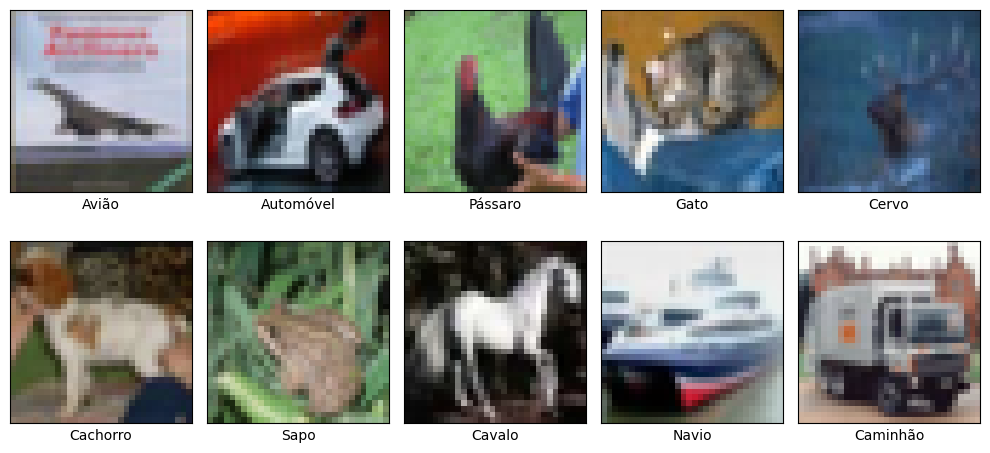

In [ ]:
# Defina as classes do CIFAR-10
class_names = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo',
               'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

# Crie um dicionário para mapear as classes para as imagens correspondentes
class_to_image = {}
for i in range(10):
    index = (test_labels == i).nonzero()[0][0]  # Encontre o primeiro índice da classe
    class_to_image[i] = test_images[index]

# Mostre uma imagem de cada classe
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])  # Remova os rótulos do eixo x
    plt.yticks([])  # Remova os rótulos do eixo y
    plt.imshow(class_to_image[i])
    plt.xlabel(class_names[i])

plt.tight_layout()
plt.show()

Abaixo, convertemos os rótulos escalares (números de 0 a 9) para one-hot encoding.

Não é necessário realizar este passo, caso seja utilizada a função de custo esparse_categorical_cross_entropy

In [ ]:
# Converter para codificação one-hot dos labels
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)
#Não é necessário se utilizar como função de custo esparse_categorical_cross_entropy

NameError: name 'tf' is not defined

Função que retorna uma rede neural para o cifar-10

In [ ]:
# Crie o modelo de rede neural convolucional simples
def get_cifar10_network():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),#(32, 32, 3) porque as imagens são 32X32 e RGB, portanto, tendo 3 canais de cor
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 10 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',#pode ser substituída pela esparse_categorical_cross_entropy
                  metrics=['accuracy'])

    model.summary()

    return model

Trecho para treinar e avaliar a rede neural.
O treino é realizado com os dados de treino e a avaliação do modelo é realizada nos dados de teste.

In [ ]:
# Treine o modelo
model = get_cifar10_network()
model.fit(train_images, train_labels, epochs=10)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

NameError: name 'keras' is not defined

Na célula abaixo, adicione o código para carregar os demais datasets

In [ ]:
#Inclua o código para carregar os demais datasets
# Carregar o conjunto de dados CIFAR-100
cifar100 = keras.datasets.cifar100
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

#Carregar o conjunto de dados mnist
mnist = keras.datasets.mnist
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = mnist.load_data()

#Carregar o conjunto de dados fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(train_images_fm, train_labels_fm), (test_images_fm, test_labels_fm) = fashion_mnist.load_data()

NameError: name 'keras' is not defined

Tarefa
Escreva código para executar redes neurais nos seguintes datasets:

MNIST (pode aproveitar o codigo existente)
Fashion MNIST
CIFAR-10
CIFAR-100
Cada execução deve ser por 10 épocas.

Você deve preencher as funções a seguir para retornarem a rede neural com a melhor configuração que você conseguiu para cada dataset. O notebook deve ser entregue com a rede neural que obteve a melhor performance em cada conjunto de dados.

IMPORTANTE: as funções não devem TREINAR nem AVALIAR as redes neurais, apenas instanciá-las e retorná-las.

Ao final, preencha o dict results com o desempenho encontrado em cada execução.

In [ ]:
# arquivo: train_examples.py
import tensorflow as tf
from tensorflow import keras
import numpy as np

# --- Redes (uma por dataset) ---
def get_mnist_network():
    return keras.Sequential([
        keras.layers.Input(shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((1, 1)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ])

def get_fashion_mnist_network():
    return keras.Sequential([
        keras.layers.Input(shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ])

def get_cifar10_network():
    return keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),#(32, 32, 3) porque as imagens são 32X32 e RGB, portanto, tendo 3 canais de cor
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # 10 classes de saída
    ])

def get_cifar100_network():
    return keras.Sequential([
        keras.layers.Input(shape=(32, 32, 3)),
        keras.layers.MaxPooling2D((4, 4)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(100, activation='softmax'),
    ])

# --- Função para carregar e pré-processar os dados (treino + teste) ---
def load_dataset(dataset_name):
    """
    Retorna: (train_images, train_labels), (test_images, test_labels)
    - normaliza para [0,1]
    - garante canais (H,W,1) para MNIST/Fashion
    - "squeeze" das labels quando necessário (cifar retorna shape (N,1))
    """
    if dataset_name == "mnist":
        (trX, trY), (teX, teY) = keras.datasets.mnist.load_data()
        trX = trX[..., None].astype("float32") / 255.0
        teX = teX[..., None].astype("float32") / 255.0
        trY = trY.astype("int64")
        teY = teY.astype("int64")

    elif dataset_name == "fashion_mnist":
        (trX, trY), (teX, teY) = keras.datasets.fashion_mnist.load_data()
        trX = trX[..., None].astype("float32") / 255.0
        teX = teX[..., None].astype("float32") / 255.0
        trY = trY.astype("int64")
        teY = teY.astype("int64")

    elif dataset_name == "cifar10":
        (trX, trY), (teX, teY) = keras.datasets.cifar10.load_data()
        trX = trX.astype("float32") / 255.0
        teX = teX.astype("float32") / 255.0
        trY = np.squeeze(trY).astype("int64")
        teY = np.squeeze(teY).astype("int64")

    elif dataset_name == "cifar100":
        (trX, trY), (teX, teY) = keras.datasets.cifar100.load_data(label_mode='fine')
        trX = trX.astype("float32") / 255.0
        teX = teX.astype("float32") / 255.0
        trY = np.squeeze(trY).astype("int64")
        teY = np.squeeze(teY).astype("int64")

    else:
        raise ValueError(f"Dataset desconhecido: {dataset_name}")

    return (trX, trY), (teX, teY)

# --- Execução principal (mude dataset_name conforme quiser) ---
if __name__ == "__main__":
    dataset_name = "fashion_mnist"  # opções: "mnist", "fashion_mnist", "cifar10", "cifar100"

    # escolher arquitetura
    if dataset_name == "mnist":
        model = get_mnist_network()
    elif dataset_name == "fashion_mnist":
        model = get_fashion_mnist_network()
    elif dataset_name == "cifar10":
        model = get_cifar10_network()
    elif dataset_name == "cifar100":
        model = get_cifar100_network()
    else:
        raise ValueError("Dataset inválido")

    # carregar dados
    (train_images, train_labels), (test_images, test_labels) = load_dataset(dataset_name)

    # compilar
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    # treinar
    model.fit(train_images, train_labels, epochs=10)

    # resumo e avaliação
    model.summary()
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7217 - loss: 0.8069
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8248 - loss: 0.4898
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8386 - loss: 0.4480
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8448 - loss: 0.4245
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8521 - loss: 0.4040
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8517 - loss: 0.3987
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8602 - loss: 0.3788
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8623 - loss: 0.3712
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8688 - loss: 0.3540
Epoch 10/10
1875/18

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        12,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,776 (155.38 KB)

 Trainable params: 13,258 (51.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,518 (103.59 KB)

313/313 - 1s - 3ms/step - accuracy: 0.8484 - loss: 0.4069
Acurácia no conjunto de teste: 84.84%


Preencha o dict abaixo substituindo os None com a acuracia final (acc) e o tempo de treinamento (time) encontrado no seu experimento pra cada dataset

In [ ]:
results = {
    "mnist": {"time": "1 minuto e 21 segundos", "acc": "97,52%"},
    "fashion_mnist": {"time": "1 minuto e 5 segundos", "acc": "85,33%"},
    "cifar10": {"time": "10 minutos e 48 segundos", "acc": "65.97%"},
    "cifar100": {"time": "1 minuto e 17 segundos", "acc": "18.27%"},
}